In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


Dataset created successfully
X_train shape: (300, 128, 128, 1)
y_train shape: (300, 5)

Training with HIGH learning rate (0.001)
Epoch 1/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 817ms/step - accuracy: 0.2200 - loss: 3.2085 - val_accuracy: 0.1375 - val_loss: 1.6089
Epoch 2/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 680ms/step - accuracy: 0.2545 - loss: 1.6085 - val_accuracy: 0.2750 - val_loss: 1.6096
Epoch 3/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 817ms/step - accuracy: 0.2609 - loss: 1.6075 - val_accuracy: 0.2750 - val_loss: 1.6129
Epoch 4/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 775ms/step - accuracy: 0.2408 - loss: 1.5959 - val_accuracy: 0.2750 - val_loss: 1.6117
Epoch 5/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 662ms/step - accuracy: 0.2422 - loss: 1.6014 - val_accuracy: 0.2750 - val_loss: 1.6101
Epoch 6/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 792ms/step - accuracy: 0.2981 - loss: 1.5826 - val_accuracy: 0.2750 - val_loss: 1.6150
Epoch 7/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 789ms/step - accuracy: 0.2624 - loss: 1.6011 - val_accuracy:

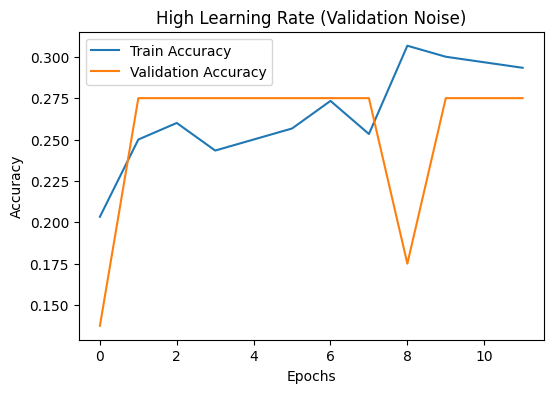


Training with LOW learning rate (0.0001)
Epoch 1/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 866ms/step - accuracy: 0.2183 - loss: 1.6847 - val_accuracy: 0.1250 - val_loss: 1.6578
Epoch 2/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 694ms/step - accuracy: 0.2330 - loss: 1.5869 - val_accuracy: 0.1625 - val_loss: 1.6470
Epoch 3/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 798ms/step - accuracy: 0.2100 - loss: 1.6240 - val_accuracy: 0.1250 - val_loss: 1.6608
Epoch 4/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 684ms/step - accuracy: 0.2128 - loss: 1.5963 - val_accuracy: 0.2750 - val_loss: 1.6202
Epoch 5/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 693ms/step - accuracy: 0.3023 - loss: 1.5725 - val_accuracy: 0.2750 - val_loss: 1.6376
Epoch 6/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 821ms/step - accuracy: 0.2952 - loss: 1.5407 - val_accuracy: 0.1250 - val_loss: 1.6462
Epoch 7/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 812ms/step - accuracy: 0.3919 - loss: 1.5329 - val_accuracy: 0.1250 - val_loss: 1.6247
Epoch 8/12
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 649ms/step - accur

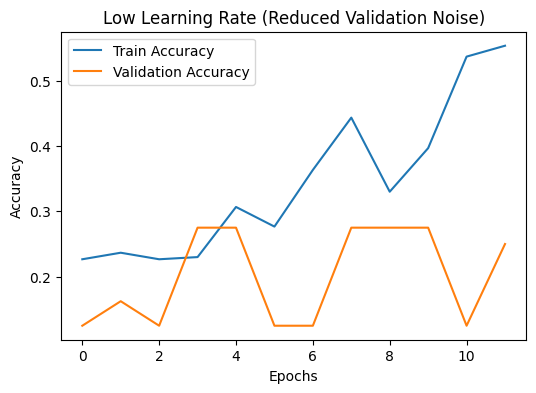

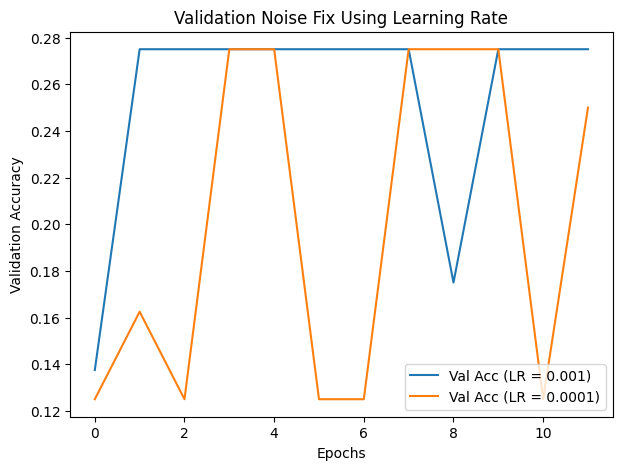


Experiment completed successfully


In [ ]:
# LEARNING RATE EXPERIMENT TO FIX VALIDATION NOISE

# -------- STEP 1: Import Required Libraries --------
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


# -------- STEP 2: Create Dummy Dataset --------
# (Used only to demonstrate training behavior)

num_classes = 5
img_height = 128
img_width = 128
channels = 1

num_train = 300
num_val = 80

# Random spectrogram-like images
X_train = np.random.rand(num_train, img_height, img_width, channels)
X_val = np.random.rand(num_val, img_height, img_width, channels)

# Random labels
y_train = np.random.randint(0, num_classes, num_train)
y_val = np.random.randint(0, num_classes, num_val)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

print("Dataset created successfully")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


# -------- STEP 3: Function to Build CNN Model --------
def build_cnn(input_shape, num_classes):
    model = Sequential()
    model.add(Input(shape=input_shape))

    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(num_classes, activation='softmax'))

    return model


# EXPERIMENT 1: HIGH LEARNING RATE (NOISY)

print("\nTraining with HIGH learning rate (0.001)")

model_high_lr = build_cnn((128,128,1), num_classes)

model_high_lr.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_high = model_high_lr.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=12,
    batch_size=32
)


# -------- Plot High Learning Rate --------
plt.figure(figsize=(6,4))
plt.plot(history_high.history['accuracy'], label='Train Accuracy')
plt.plot(history_high.history['val_accuracy'], label='Validation Accuracy')
plt.title("High Learning Rate (Validation Noise)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# EXPERIMENT 2: LOW LEARNING RATE (FIXED)

print("\nTraining with LOW learning rate (0.0001)")

model_low_lr = build_cnn((128,128,1), num_classes)

model_low_lr.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_low = model_low_lr.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=12,
    batch_size=32
)


# -------- Plot Low Learning Rate --------
plt.figure(figsize=(6,4))
plt.plot(history_low.history['accuracy'], label='Train Accuracy')
plt.plot(history_low.history['val_accuracy'], label='Validation Accuracy')
plt.title("Low Learning Rate (Reduced Validation Noise)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


# FINAL COMPARISON

plt.figure(figsize=(7,5))
plt.plot(history_high.history['val_accuracy'], label='Val Acc (LR = 0.001)')
plt.plot(history_low.history['val_accuracy'], label='Val Acc (LR = 0.0001)')
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Noise Fix Using Learning Rate")
plt.legend()
plt.show()

print("\nExperiment completed successfully")
